#ONLINE RETAIL DATASET CLEANING.

Source: https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset

This online retail dataset contains approximately 541,909 entries and can provide vital information. 

#Data:
The dataset contains the following attributes:
-InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
-StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
-Description: Product (item) name. Nominal.
-Quantity: The quantities of each product (item) per transaction. Numeric.
-InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
-UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
-CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
-Country: Country name. Nominal. The name of the country where a customer resides.


#Objectives:
-Identify missing values and perform data cleaning.
-Identify inconsistent data formatting and conduct data normalization. 
-Add logical checks to validate data.
-Detect outliers in the data and either remove them or ensure consistency

In [102]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
#loading the dataset
df= pd.read_excel(r"C:\Users\PC\OneDrive\Files\Documents\Data Projects\Online Retail Data.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


-DATA CLEANING

In [105]:

#checking for null values
#df.isnull().sum()
df.info()
#df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


-In the dataset, CustomerID is missing. Given the structure of this dataset, missing 
CustomerID means that the information associated with the null columns ceases to be useful. Thus, 
dropping the nulls in the CustomerID column is logical

In [106]:
df=df.dropna(subset=["CustomerID"])

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [107]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


-The description shows that there are two columns that are concerning and these are the
Quantity and UnitPrice Columns. The minimum in Quantity is (-) showing that there are
challenges. The Unit Price column has a minimum of 0 and no item can be priced at 0.

In [108]:
#Create a (-) quantity dataset
df_returns= df[df['Quantity']<0]

df_returns.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


-The InvoiceNo where the quantity is negative shows 'C' which means that the items were
cancelled or returned. Before cleaning the dataset, we can identify the top most returned items.

In [109]:
df_top_returns=df_returns["Description"].value_counts().head(10)
df_top_returns

Description
REGENCY CAKESTAND 3 TIER              181
Manual                                175
POSTAGE                                97
JAM MAKING SET WITH JARS               86
Discount                               77
SET OF 3 CAKE TINS PANTRY DESIGN       73
STRAWBERRY CERAMIC TRINKET BOX         55
ROSES REGENCY TEACUP AND SAUCER        53
RECIPE BOX PANTRY YELLOW DESIGN        47
WOOD 2 DRAWER CABINET WHITE FINISH     45
Name: count, dtype: int64

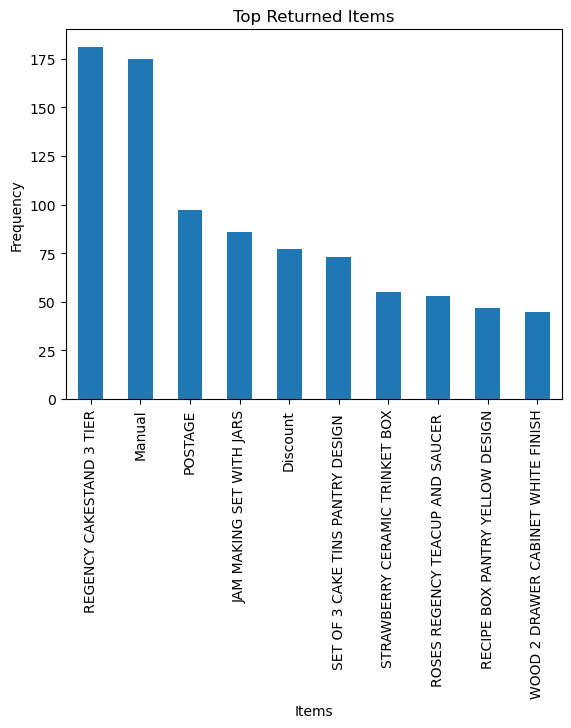

In [110]:
df_top_returns.plot(
    x="Description",
    kind="bar"
)
plt.xlabel("Items")
plt.ylabel("Frequency")
plt.title("Top Returned Items")

plt.show()

-Cleaning the dataset by removing items that were returned or cancelled.

In [111]:
df=df[
    (df['Quantity']>0) &
(~df['InvoiceNo'].astype(str).str.startswith('C'))
]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [112]:
#Validating the data and ensuring there are no Cs in the invoice
invoice_df= df[df['InvoiceNo'].str.contains('C', na=False)]
invoice_df

AttributeError: Can only use .str accessor with string values!

-The cancelled items have been removed from the dataset. The error also shows that
dropping the negatives in the Quantity column automatically removes items that have been 
returned and tagged as C in the InvoiceNo.

In [113]:
#Checking the Description

df['Description'].isnull().sum()

df= df.dropna(subset='Description')

df.isnull().sum()
              

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [114]:
#Fixing the Unit Price

df=df[df['UnitPrice']>0.001].copy()

df['UnitPrice'].describe()


count    397880.000000
mean          3.116519
std          22.097986
min           0.040000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

-The threshold for the unit price is set to 0.001 because any values that are under 0
are assumed to be errors since no product can be under 0.

In [115]:
#Standardizing the data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397880 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397880 non-null  object        
 1   StockCode    397880 non-null  object        
 2   Description  397880 non-null  object        
 3   Quantity     397880 non-null  int64         
 4   InvoiceDate  397880 non-null  datetime64[ns]
 5   UnitPrice    397880 non-null  float64       
 6   CustomerID   397880 non-null  float64       
 7   Country      397880 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [116]:
#incoviceNo
df['InvoiceNo'].astype(str)

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 397880, dtype: object

In [118]:
#InvoiceDate
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])

df['InvoiceDate']

#Converting to Month, day, and hour

df['InvoiceMonth']= df['InvoiceDate'].dt.to_period("M")
df['InvoiceDay']=df['InvoiceDate'].dt.day
df['InvoiceHour']=df['InvoiceDate'].dt.hour

df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceMonth', 'InvoiceDay',
       'InvoiceHour'],
      dtype='object')

-Categorising the invoice date to month, day, and hour will be important for trend for visualisation

In [119]:
#Standardizing object type columns
df['Description']= df['Description'].str.strip().str.upper()
df['Country']= df['Country'].str.strip()

Standardizing the description and country columns is data normalization and prevents the logical duplication of data
during analysis when merging and groupby may be used. 

In [120]:
#Adding a total price column
df['TotalPrice']= df['Quantity']*df['UnitPrice']

df['TotalPrice'].head()


0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: TotalPrice, dtype: float64

-This totalprice column is expected as it will contribute to the data analysis and modelling. 

In [121]:
#Checking the data quality before saving the file
print("Rows:", df.shape[0])
print("CustomerID:", df['CustomerID'].nunique())

Rows: 397880
CustomerID: 4338


There are certain assumptions that have been implemented in the cleaning of this data:
-The rows with missing CustomerID were eliminated since CustomerID is needed to perform 
customer level analysis.
-The negative quantities coincided with invoices that contained C and these were considered as 
cancellations. Before dropping the negative rows in the quantity column, an EDA was done to show
which items were most often returned. 
-Unit prices that were below 0.001 were removed since retail prices are never below 0.

In [122]:
#Saving the Cleaned dataset
df.to_csv(r"Cleaned_Online_Retail_Data.xlsx", index=False)

-The data is saved in this way to prevent it from breaking if it needs to be used
in another environment or context. 